# Employee Retention Analysis

- Nama: Nantha Seutia
- Email: ombakrinai@gmail.com
- Id Dicoding: ombakrinai@gmail.com

## Data Gathering

### Menyiapkan library yang dibutuhkan

In [ ]:
# Import Library
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Menyiapkan data yang akan digunakan

In [ ]:
# Data Gathering
# Unduh file hanya sekali dan simpan lokal
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"
local_path = "employee_data.csv"

# Simpan lokal
import requests
with open(local_path, 'wb') as f:
    f.write(requests.get(url).content)

# Baca dari file lokal (lebih cepat)
df = pd.read_csv(local_path, encoding="utf-8")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [ ]:
df.shape, df.columns, df.duplicated().sum(), df.isnull().sum()

((1470, 35),
 Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
        'Department', 'DistanceFromHome', 'Education', 'EducationField',
        'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 np.int64(0),
 EmployeeId                    0
 Age                           0
 Attrition                   412
 BusinessTravel                0
 DailyRate                     0
 Department                    0
 DistanceFromHome              0
 Education             

* Jumlah records 1470 dan kolom 35.
* Tidak ada duplikasi.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

* Kolom Attrition hanya memiliki 1058 non-null dari 1470 → hilang sebanyak 412 entri.
* Perlu pemeriksaan apakah data hilang berkaitan dengan korelasi tertentu atau acak.
* Satu kolom numerik float: Attrition (seharusnya biner: 0 atau 1) bisa dikonversi ke int.
* 8 kolom kategorikal: object → perlu encoding pada tahap Data Preparation.

In [ ]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


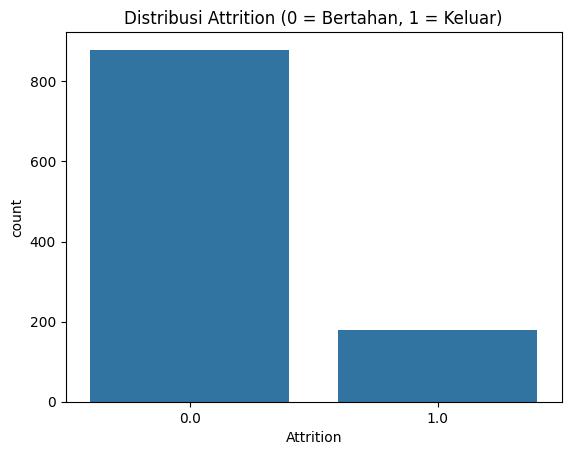

,count
Attrition,
0.0,879
NaN,412
1.0,179


In [ ]:
# Mengecek Distribusi Target
sns.countplot(data=df, x="Attrition")
plt.title("Distribusi Attrition (0 = Bertahan, 1 = Keluar)")
plt.show()

df["Attrition"].value_counts(dropna=False)

* Dataset tidak seimbang. Perlu penanganan khusus di tahap modeling: misalnya dengan resampling, class weighting, dsb.
* 28% missing pada target harus ditangani sebelum modeling.

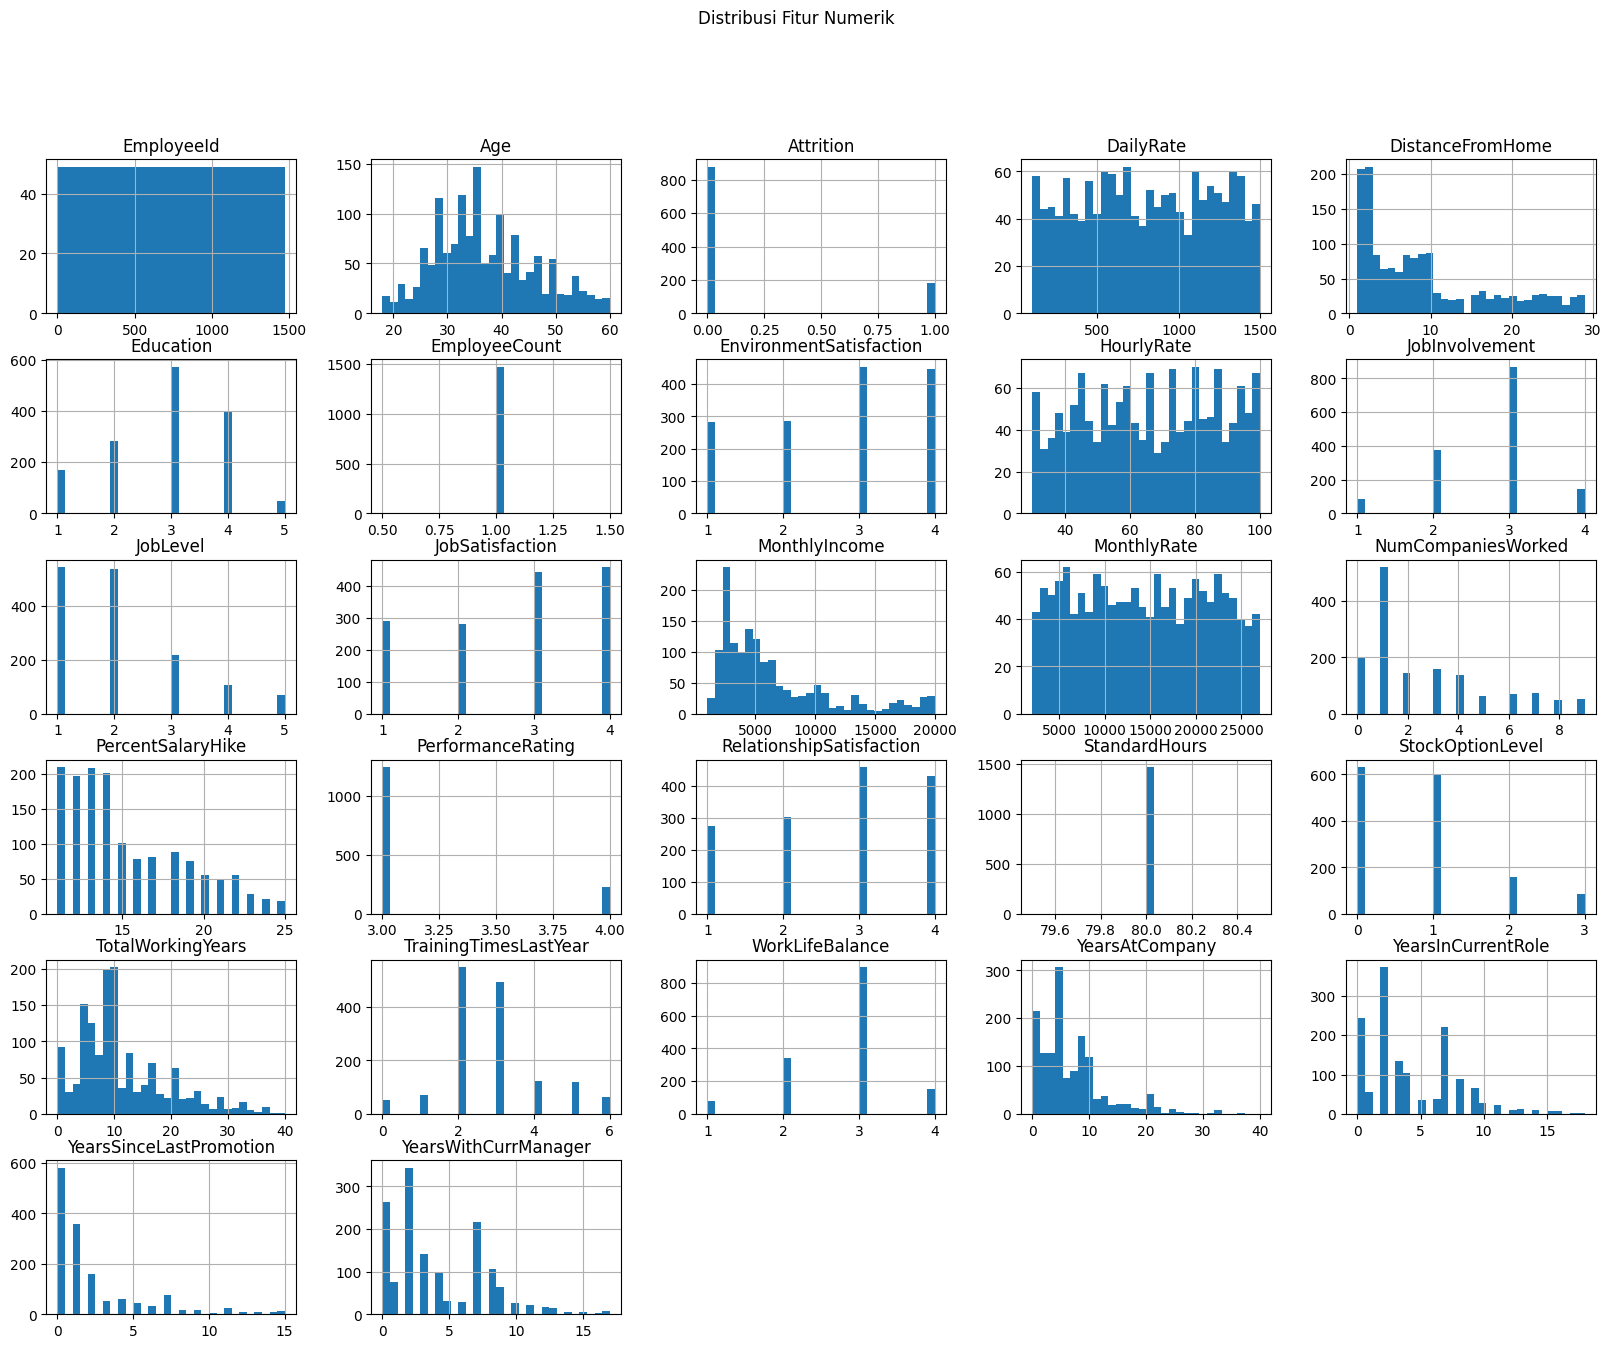

In [ ]:
# Distribusi Target & Fitur Numerik
df.hist(figsize=(20, 15), bins=30)
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

* Distribusi merata: Age, HourlyRate, MonthlyRate, DailyRate, PercentSalaryHike
* Distribusi skewed: DistanceFromHome, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager, YearsInCurrentRole
* Distribusi skewed tinggi: MonthlyIncome, TotalWorkingYears




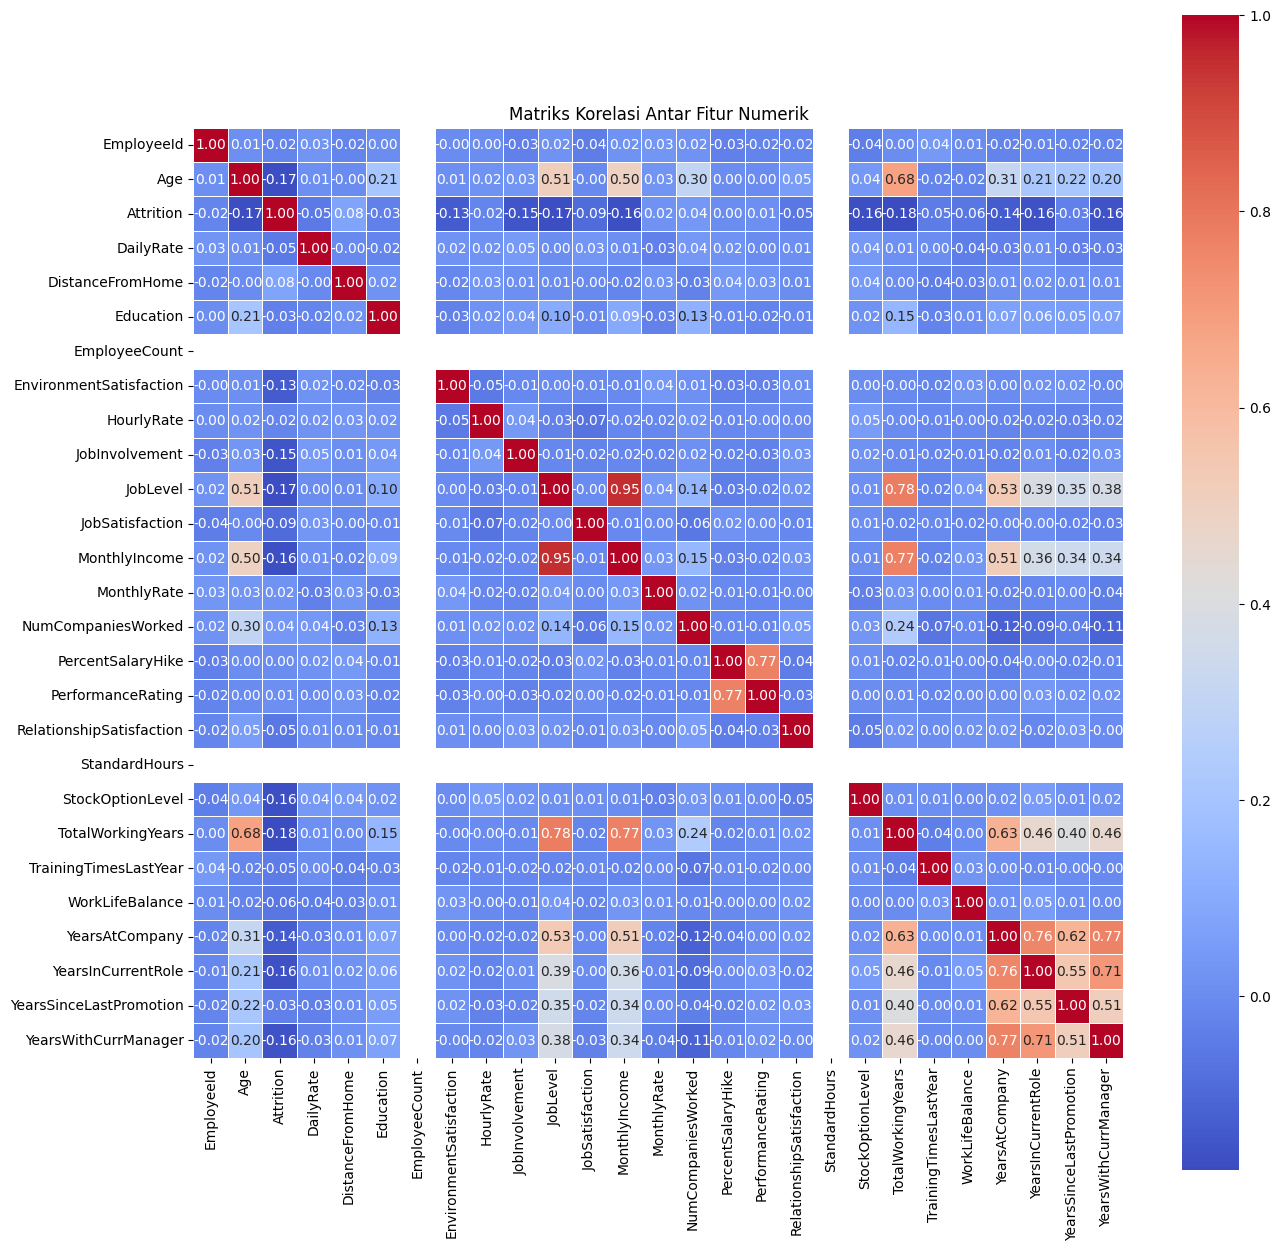

Korelasi terhadap Attrition:
DistanceFromHome            0.078074
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
PerformanceRating           0.007755
PercentSalaryHike           0.004907
HourlyRate                 -0.017524
EmployeeId                 -0.017912
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.135134
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757
MonthlyIncome              -0.163600
StockOptionLevel           -0.164228
JobLevel                   -0.169201
Age                        -0.172067
TotalWorkingYears          -0.177137
EmployeeCount                    NaN
StandardHours                    NaN
Name: Att

In [ ]:
# Heatmap Korelasi:
# * Melihat kekuatan hubungan antar fitur numerik
# * Menilai fitur apa yang berpengaruh terhadap target (Attrition)
# * Mendeteksi multikolinearitas antar fitur input (untuk modeling)

# Hitung korelasi numerik (drop kategori)
corr_matrix = df.corr(numeric_only=True)

# Fokus pada korelasi dengan Attrition (jika masih float dan belum di-drop null)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Matriks Korelasi Antar Fitur Numerik")
plt.show()

# Korelasi dengan attrition saja
attrition_corr = corr_matrix["Attrition"].drop("Attrition").sort_values(ascending=False)
print("Korelasi terhadap Attrition:")
print(attrition_corr)

Korelasi dengan Attrition
1. Korelasi Positif (semakin besar, semakin cenderung keluar)
  * DistanceFromHome (+0.078), NumCompaniesWorked (+0.037), MonthlyRate (+0.023)
  * Artinya, makin jauh jarak dari rumah, makin sering pindah kerja sebelumnya, dan nilai rate, cenderung memiliki kemungkinan keluar.
  * Korelasi lemah.

2. Korelasi Negatif (semakin besar, semakin cenderung bertahan)
  * Nilai ≤ -0.13 : EnvironmentSatisfaction, YearsAtCompany, JobInvolvement, YearsWithCurrManager, YearsInCurrentRole, MonthlyIncome, StockOptionLevel, JobLevel, Age, TotalWorkingYears.
  * Korelasinya masuk kategori lemah–sedang, tapi paling tinggi dibanding fitur lain.

4. Fitur yang direkomendasikan untuk dibuang:
  * Tidak variatif: EmployeeCount, StandardHours, Over18
  * Korelasi lemah : MonthlyRate, DailyRate, HourlyRate

## Summary - Data Understanding
1. Ringkasan Dataset
  * Jumlah baris: 1.470
  * Jumlah kolom: 35

2. Missing Values
  * Attrition: 1.058 non-null, 412 null (~28%)
  * Perlu investigasi penyebab null & decide drop/imputasi sebelum modelling

3. Distribusi Target Attrition
  * 0.0 → 879, 1.0 → 179, NaN → 412. Tidak seimbang.

4. Distribusi Awal Fitur Numerik  
   * Berdasarkan histogram, beberapa fitur menunjukkan sebaran **right-skew** tinggi (misalnya `MonthlyIncome`, `TotalWorkingYears`) → indikasi calon outlier  
   * Fitur `StandardHours` dan `EmployeeCount` terlihat **flat/konstan** di seluruh data → kandidat untuk di-drop  
   * **Catatan**: ini hanya eksplorasi awal; transformasi (log-transform, normalisasi) dilakukan di tahap Data Preparation  


5. Korelasi Kuat Antar-Fitur (negatif ≤ –0.13).
  * **Tenure (lama bekerja)**: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager.
  * **Kompensasi (imbalan finansial dan insentif)**: MonthlyIncome, JobLevel (sering berbanding lurus dengan gaji dan benefit), StockOptionLevel.
  * **Satisfaction (kepuasan)**: EnvironmentSatisfaction, JobSatisfaction.
  * **Involvement (keterlibatan/peran aktif karyawan)**: JobInvolvement.
  * **Jadikan fitur untuk modelling**.
  * Sebelum modelling: konversi Attrition ke integer setelah handle missing.

6. Kolom Konstan / Redundan
  * EmployeeCount, StandardHours, Over18 → nilai sama di seluruh baris → drop
  * EmployeeId → identifier, tidak untuk modelling

7. Insight Utama
  * Data imbalanced & banyak missing pada target (Attrition).
  * Fitur terkait tenure, kompensasi, satisfaction, dan involvement paling menjelaskan churn karyawan.
  * Harus diwaspadai multikolinearitas (mis. JobLevel vs MonthlyIncome)

## Data Preparation / Preprocessing

## Modeling

## Evaluation